# OCR Pipeline

We show how to convert a book interactively from pages into tsv and inspect intermediate results.
This involves performing OCR with Kraken.
Here we do the Fusus Al Hikam, Affifi edition.

See the documentation of the class [Book](https://among.github.io/fusus/book.html).

There is also a program
[tsvFromAffifi.py](https://github.com/among/fusus/blob/master/convert/tsvFromAffifi.py)
in this directory that executes the complete pipeline.

Use the program
[tfFromTsv.py](https://github.com/among/fusus/blob/master/convert/tfFromTsv.py)
to convert the tsv furhter into TF.

In [1]:
%load_ext autoreload
%autoreload 2
!cd `pwd`

In [2]:
from fusus.book import Book

Initialize the pipeline for processing the pages in this directory.

In [3]:
B = Book(cd="~/github/among/fusus/ur/Affifi")

Pre-process some pages, to see whether layout and lines are detected properly.
We do not do OCR yet, and we preserve intermediate results.

In [4]:
page = B.process(pages="52-58", doOcr=False, batch=False)

  0.00s Batch of 7 pages: 52-58
  0.00s Start batch processing images
   |     4.45s     1 052.tif                                 
   |     4.34s     2 053.tif                                 
   |     4.31s     3 054.tif                                 
   |     4.20s     4 055.tif                                 
   |     4.14s     5 056.tif                                 
   |     4.08s     6 057.tif                                 
   |     4.03s     7 058.tif                                 
    30s all done


We can now go to the directory *inter* and look at all histogram images.

Alternatively, we can inspect one here, e.g. page 57.

* has the layout been detected correctly?
* do we see the proper line boundaries?

In [5]:
def peek(pageNum):
    page = B.process(pages=pageNum, doOcr=False, batch=False, uptoLayout=True)
    page.show(stage="histogram")
    return page

  0.00s Batch of 1 pages: 57
  0.00s Start batch processing images
   |      |      |    -0.00s     1 057.tif                                 
  3.65s all done


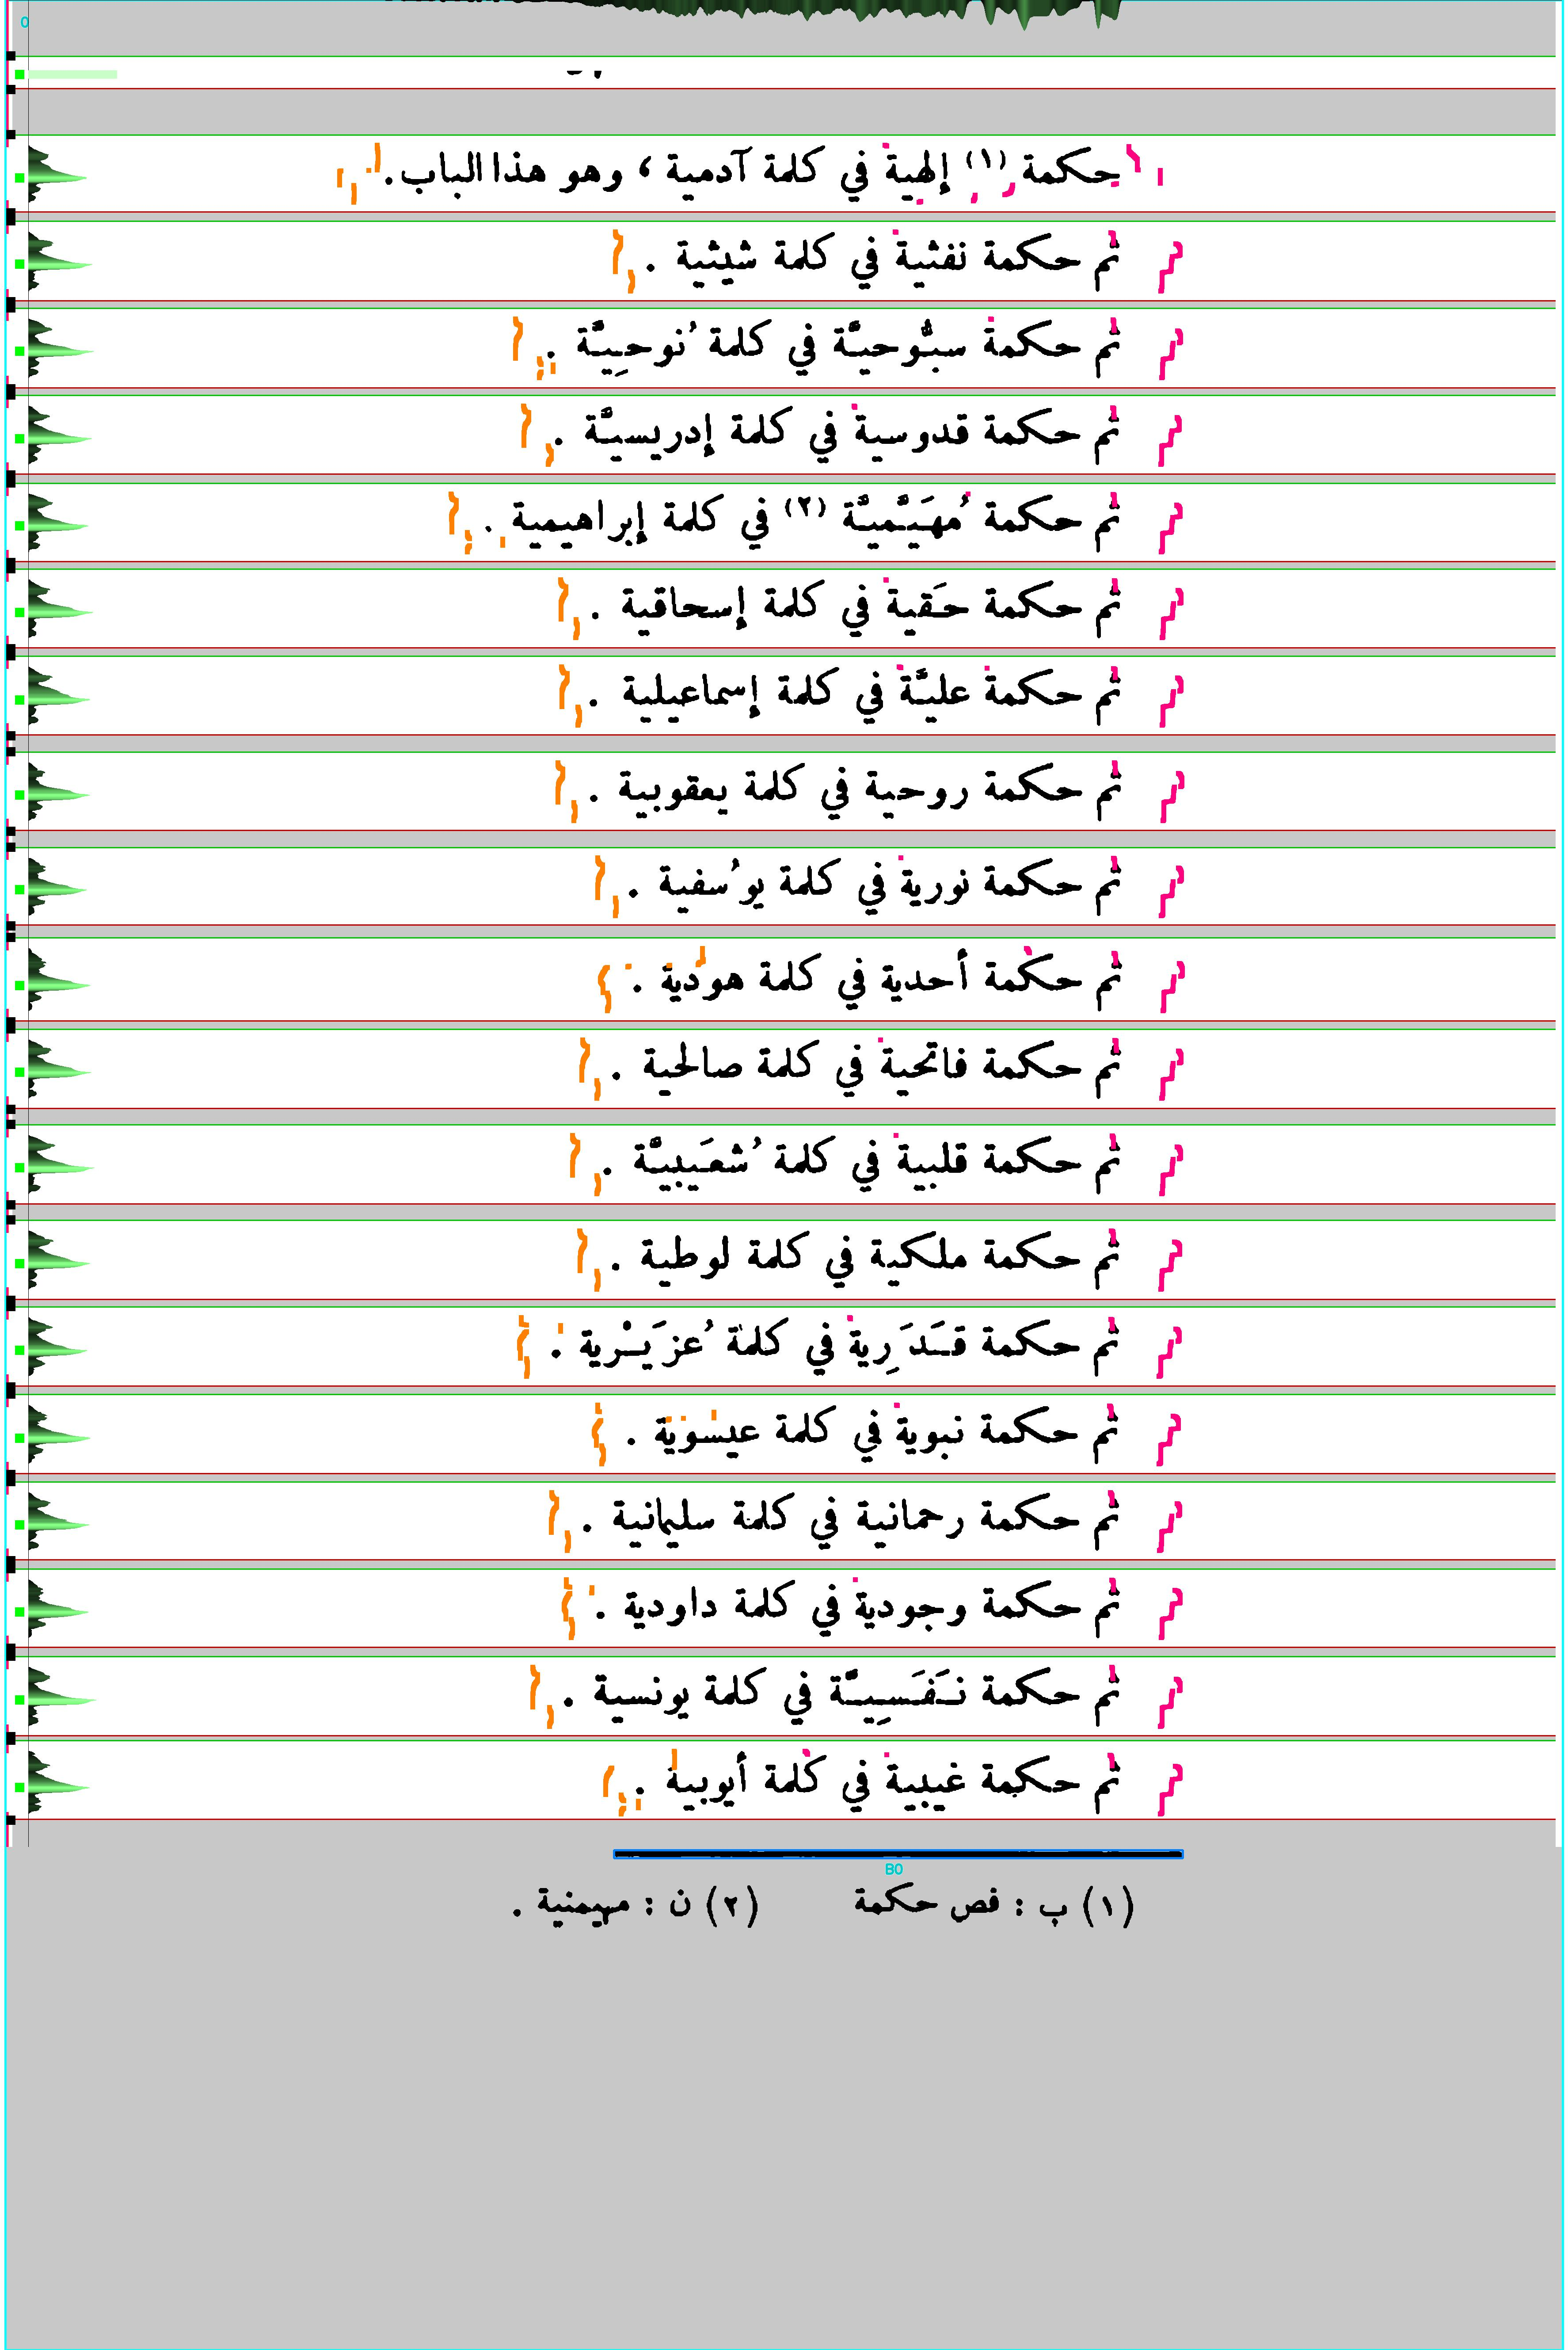

In [6]:
page = peek(57)

With the *page* object in hand, we can do more inspections.

Here is the original and a normalized version.

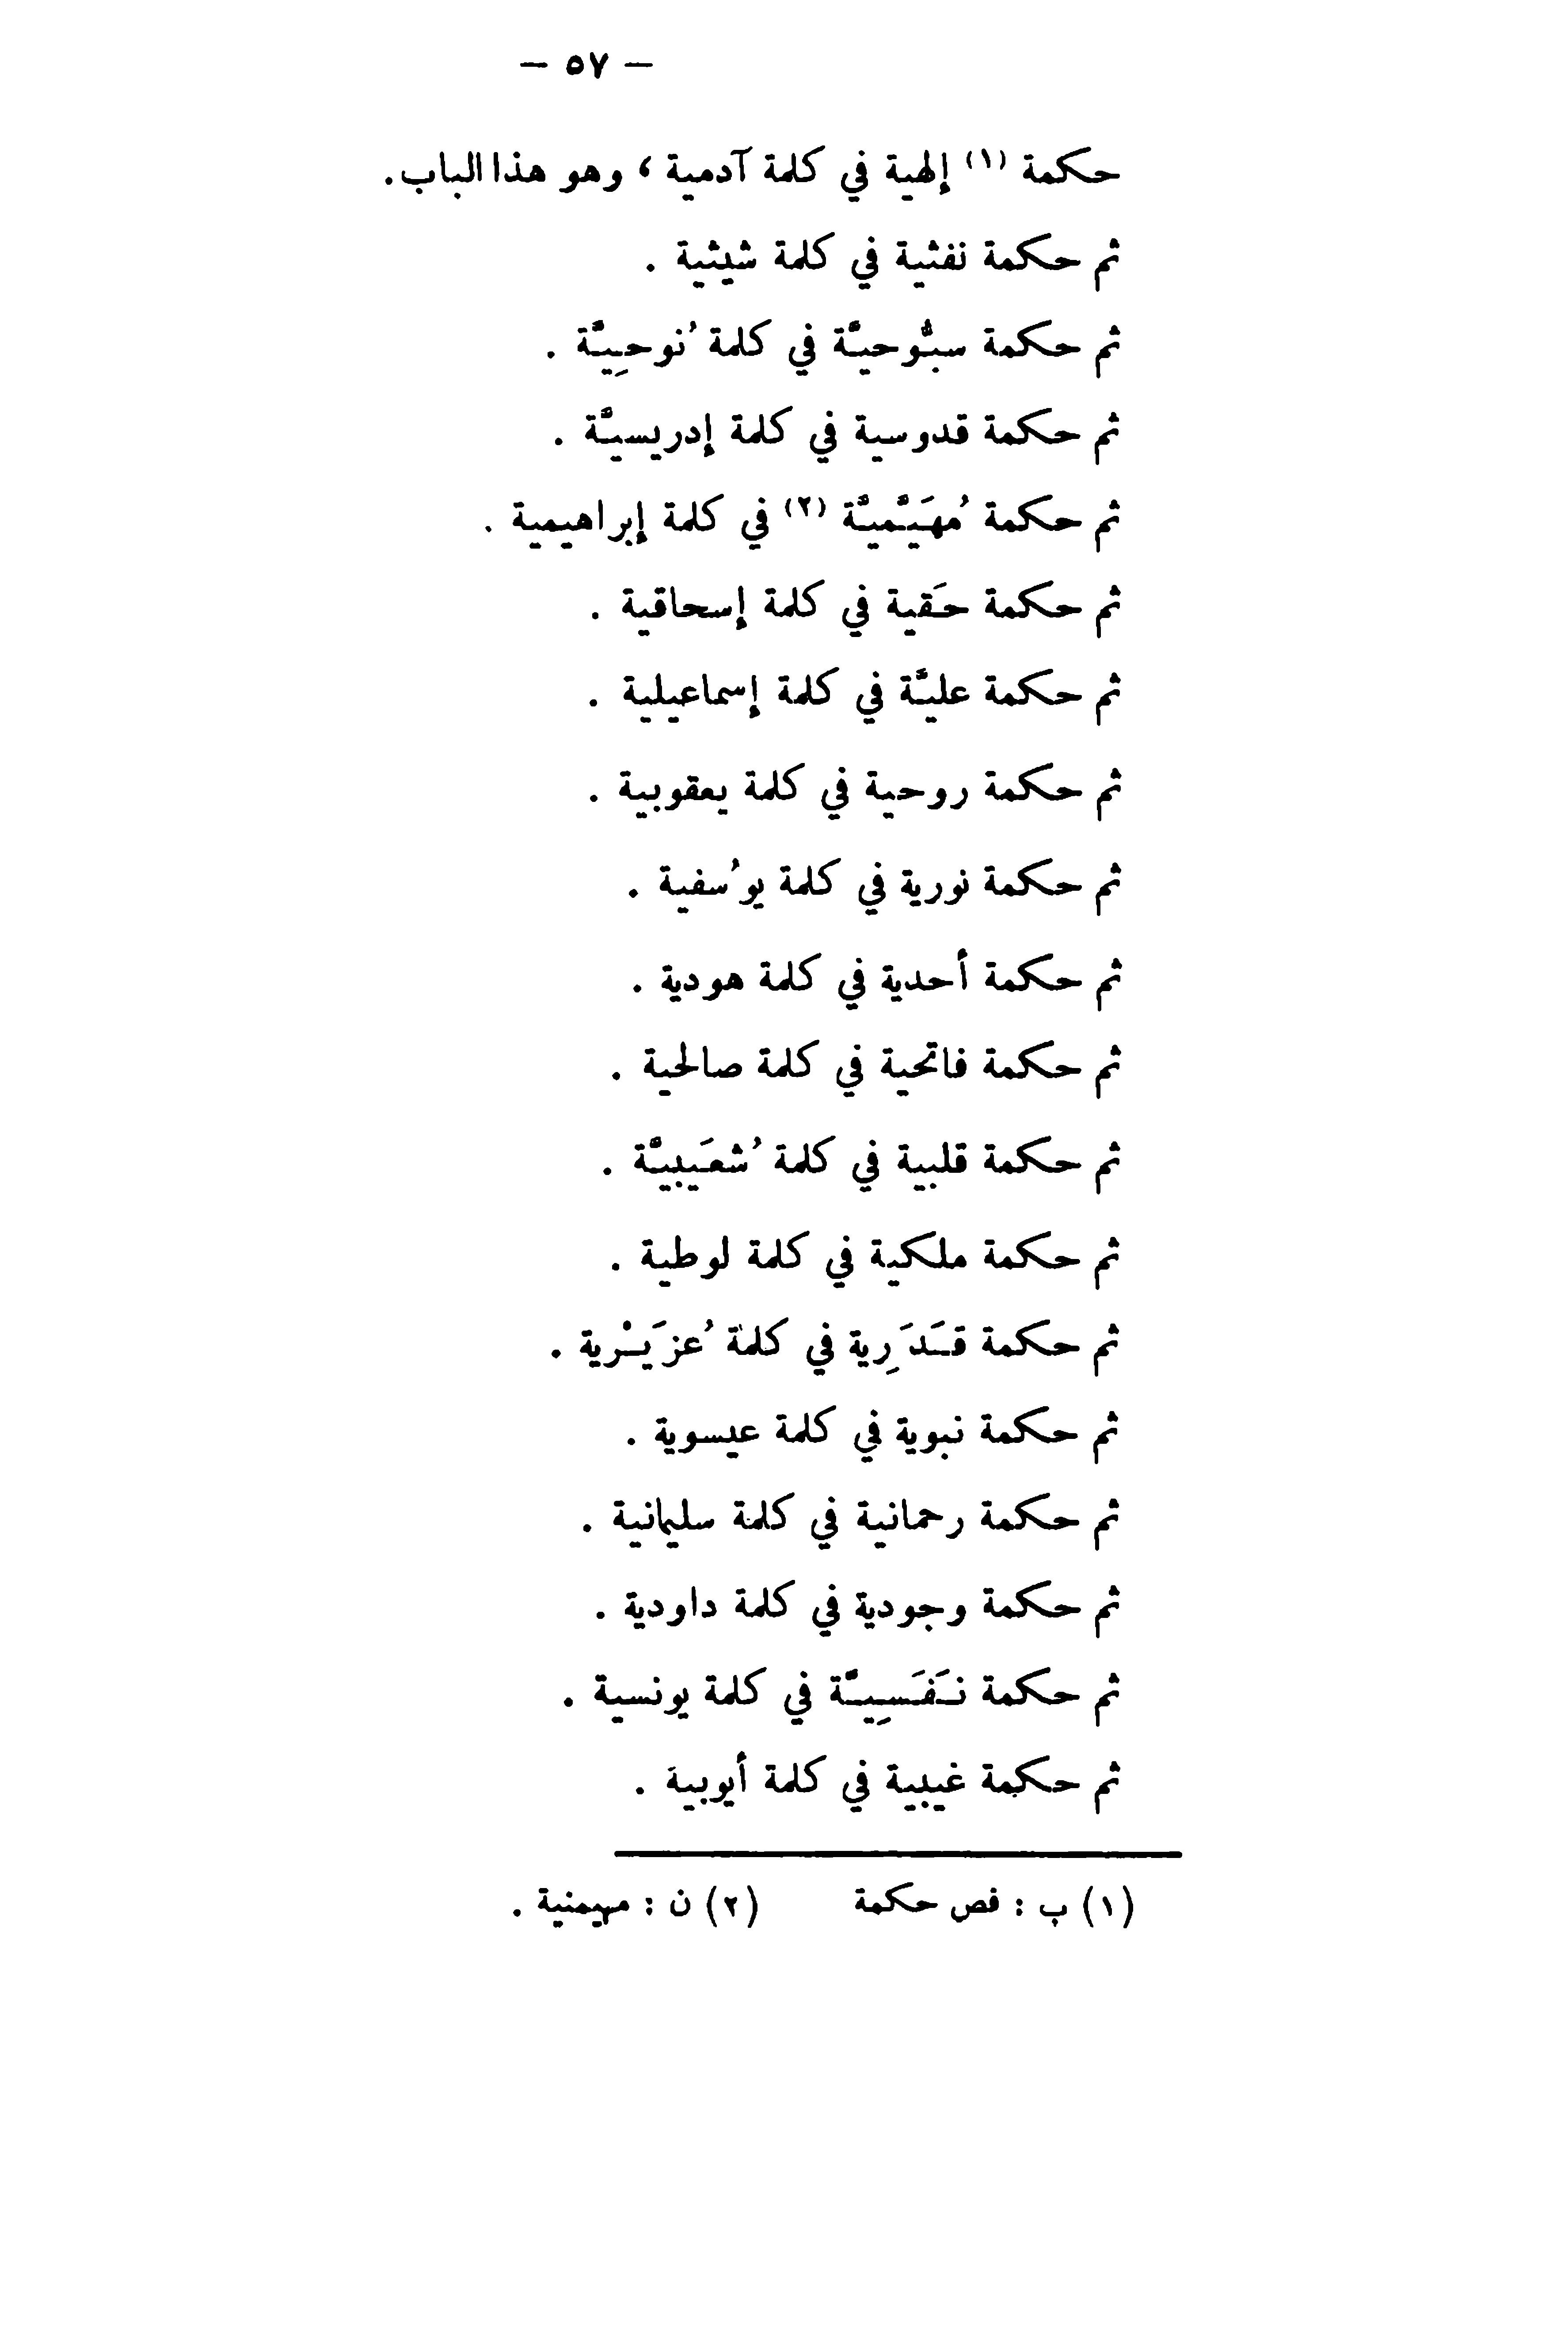

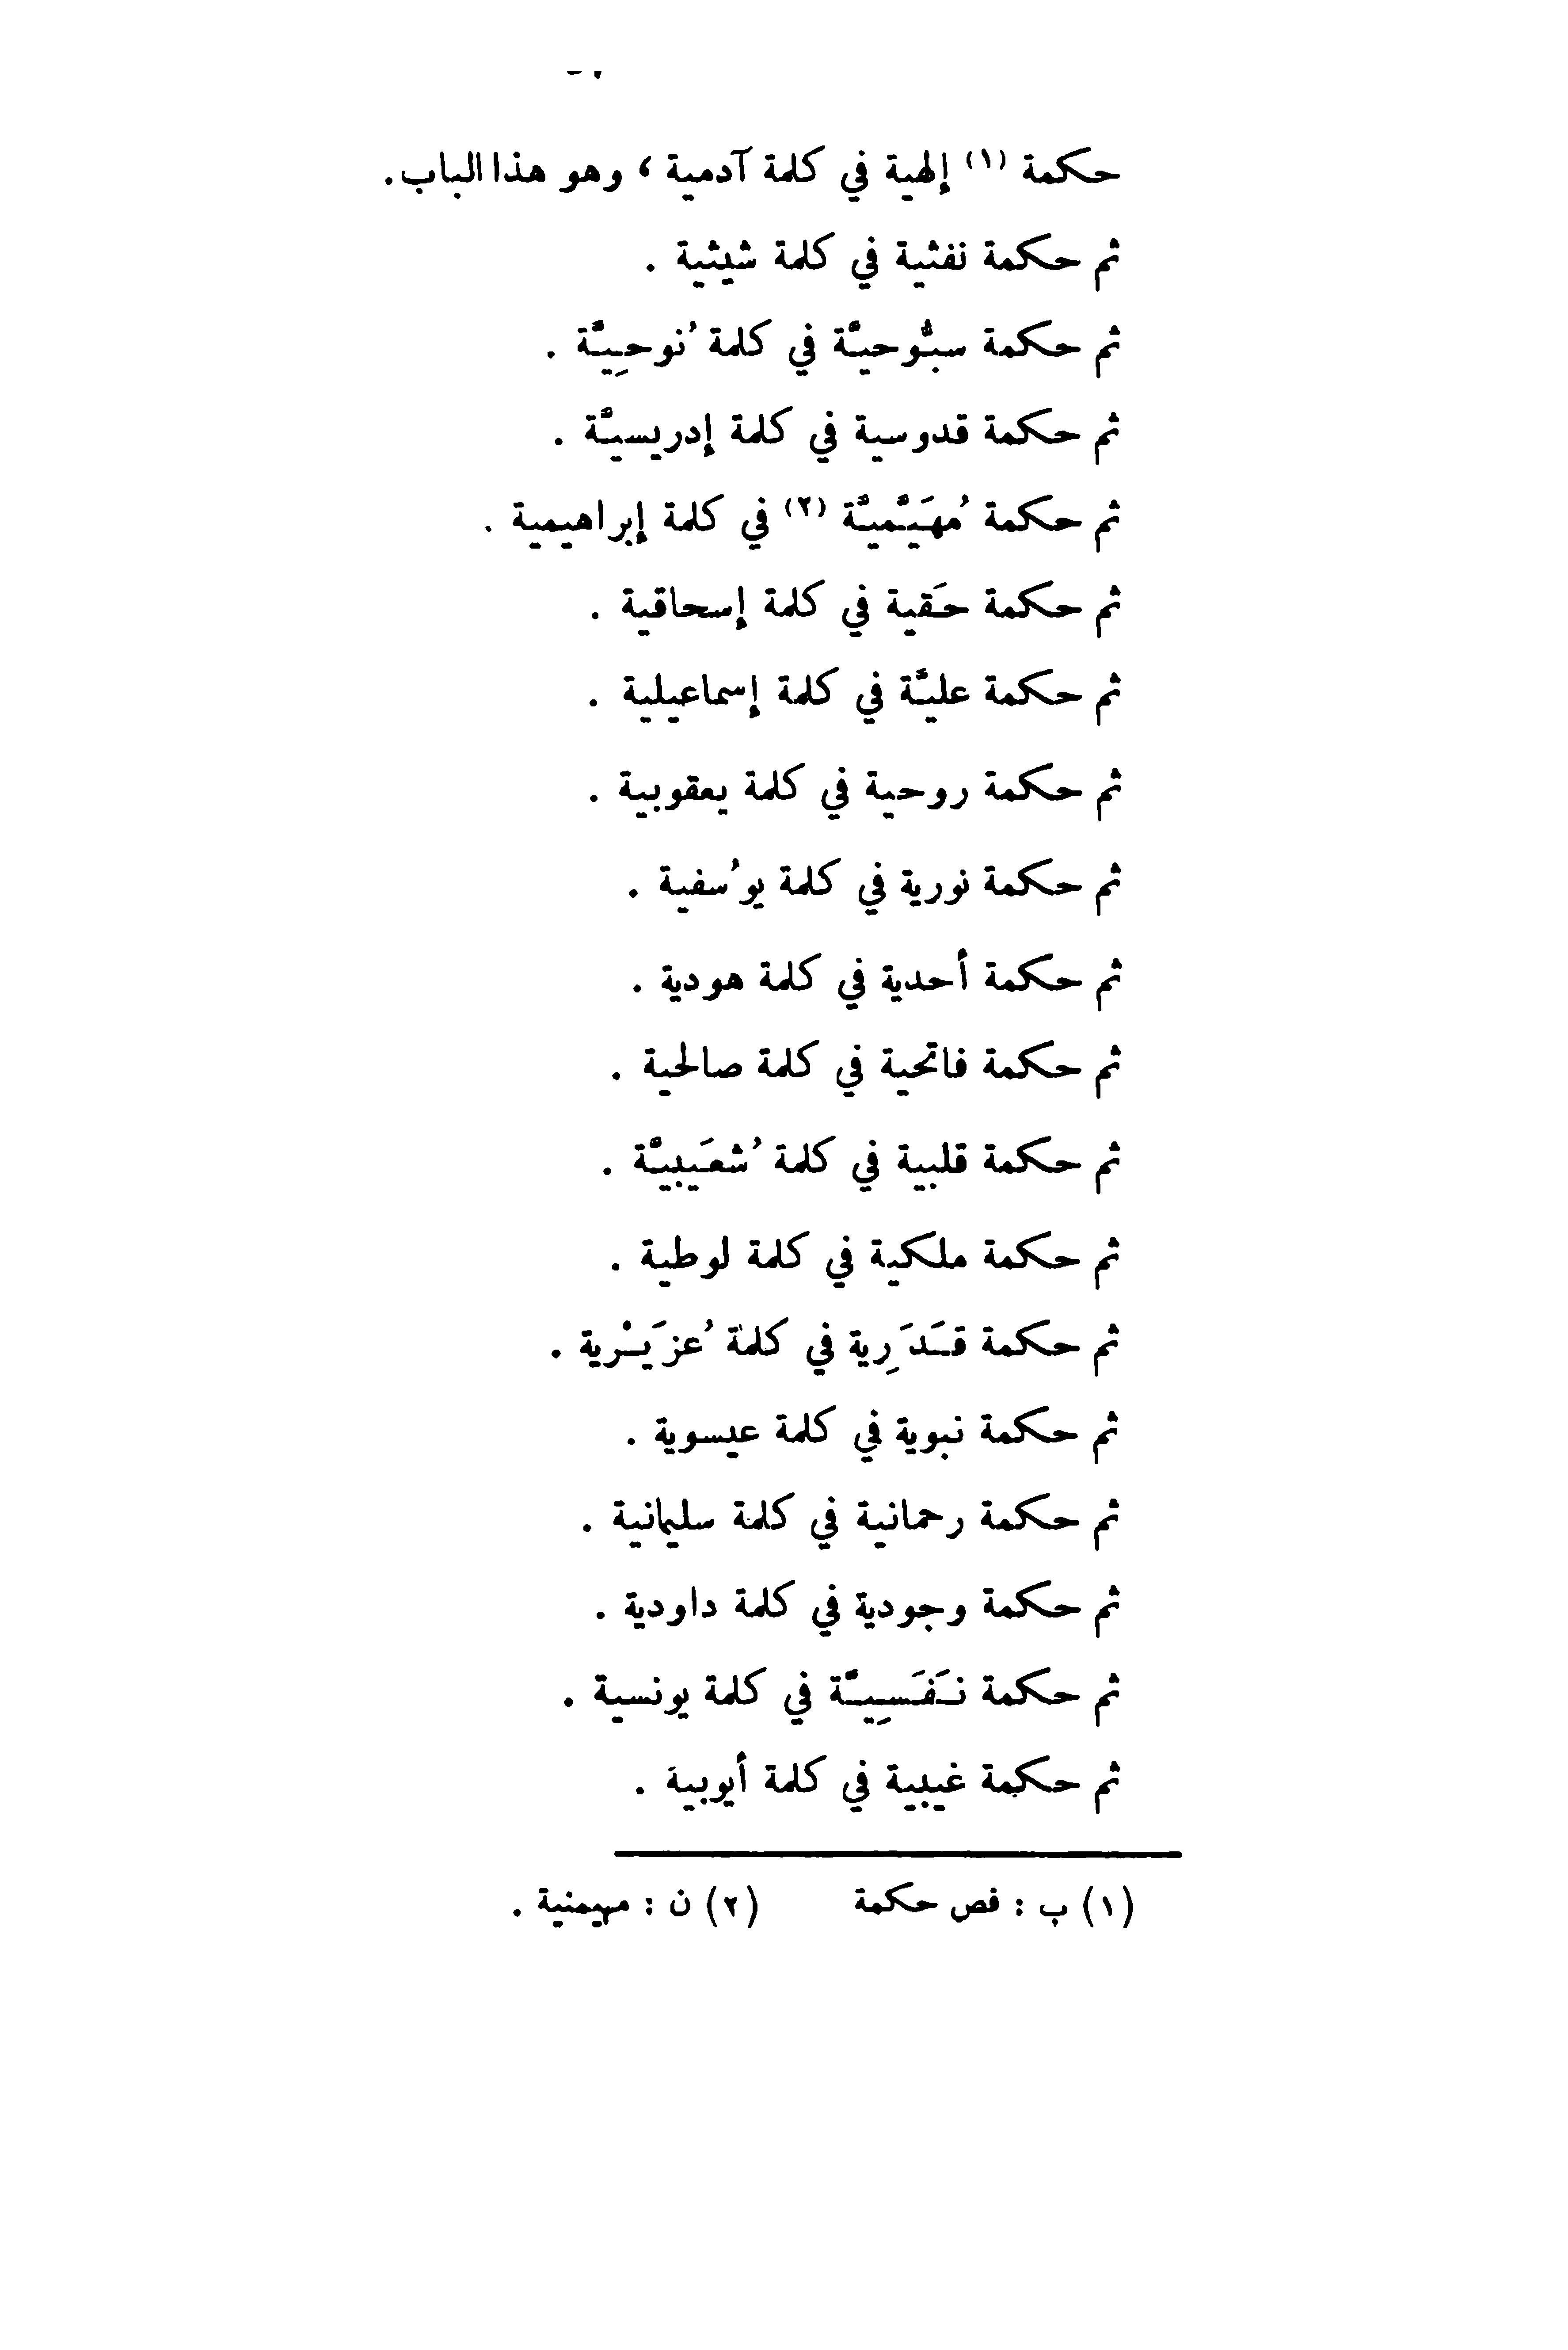

In [7]:
page.show(stage="orig,normalized")

Now we process these pages completely, including OCR, in batch mode.

In [8]:
page = B.process(pages="52-58", doOcr=True, batch=True)

  0.00s Batch of 7 pages: 52-58
  0.00s Start batch processing images
   |       21s     1 052.tif                                 
   |       15s     2 053.tif                                 
   |       13s     3 054.tif                                 
   |       13s     4 055.tif                                 
   |       13s     5 056.tif                                 
   |     7.36s     6 057.tif                                 
   |     9.06s     7 058.tif                                 
 1m 31s all done


In [9]:
B.measureQuality(pages="52-58")

 1m 31s Batch of 7 pages: 52-58
 1m 31s Start measuring ocr quality of these images
   |     0.00s word-confidences of OCR results for 7 pages   


item,# of words,min,max,average,notes
overall,1575,55,100,96,
p052,256,56,100,96,
p053,276,74,100,96,
p054,233,60,100,96,
p055,251,60,100,95,
p056,243,70,100,96,
p057,141,77,100,96,
p058,175,55,100,96,


   |     0.01s char-confidences of OCR results for 7 pages


item,# of chars,min,max,average,notes
overall,7661,35,100,96,
p052,1303,47,100,96,
p053,1376,45,100,96,
p054,1218,37,100,96,
p055,1211,35,100,96,
p056,1149,41,100,96,
p057,613,50,100,96,
p058,791,40,100,96,


   |     0.01s by-char-confidences of OCR results for 56 characters


item,# of chars,min,max,average,worst results
⌊ ⌋,1447,50,100,98,p052 p053 p058 p054 p056 p052 p055 p054 p054 p056 p052 p053 p055 p052 p052 p052 p053 p056 p054 p056
⌊(⌋,54,52,100,92,p058 p052 p052 p052 p056 p054 p057 p055 p055 p053 p058 p054 p055 p055 p053 p054 p058 p058 p052 p056
⌊)⌋,56,48,100,95,p054 p058 p053 p055 p056 p055 p056 p052 p054 p056 p057 p055 p052 p055 p052 p052 p052 p052 p054 p055
⌊-⌋,13,91,100,99,p056 p053 p052 p055 p055 p053 p053 p053 p054 p055 p056 p058 p058
⌊.⌋,91,56,100,95,p052 p054 p055 p055 p054 p055 p054 p053 p057 p053 p057 p057 p054 p058 p052 p053 p052 p053 p054 p055
⌊1⌋,21,57,100,95,p054 p054 p053 p054 p054 p057 p052 p054 p056 p056 p058 p058 p052 p052 p052 p054 p054 p055 p055 p056
⌊2⌋,15,96,100,99,p058 p052 p056 p058 p052 p057 p058 p052 p053 p054 p054 p055 p056 p057 p058
⌊3⌋,11,76,100,96,p054 p052 p054 p056 p053 p053 p054 p055 p056 p057 p058
⌊4⌋,7,90,100,97,p056 p054 p056 p055 p052 p053 p058
item,# of chars,min,max,average,worst results


 1m 31s all done


In [10]:
B.plainText(pages="52-58")

 1m 32s Batch of 7 pages: 52-58
 1m 32s Start producing plain text of these pages
 1m 32s written to text/52-58.html                           


[Result text](text/52-58.html)